# Código TP1: Generación de Datos y Ajuste de Modelos

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import pandas as pd

# Ejercicio 1

## Ejercicio 1a (Diagonal)

In [135]:
def diagonal(d: int, C: float, n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Genera sampleos de dos gausianas d-dimensionales en posición diagonal
    (una respecto a la otra), con dispersión C * sqrt(d).
    Cada sampleo posee n/2 puntos.

    Argumentos:
        d: número de dimensiones
        C: constante de ajuste de dispersión

    Retorna:
        X: matriz con d columnas y n filas de datos
        y: arreglo de n elementos con las clases correspondientes
            a cada fila de datos
    """
    data1 = np.random.multivariate_normal(np.full(d, -1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
    data2 = np.random.multivariate_normal(np.full(d, 1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
    data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
    df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(d)]))

    X = df.iloc[:, 1:].to_numpy()
    y = df.iloc[:, 0].to_numpy()
    return X, y

## Ejercicio 1b (Espirales)

In [136]:
def espirales(n: int) -> Tuple[np.ndarray, np.ndarray]:
    """ Generador de espirales """
    # Generar puntos en coordenadas polares
    n_per_class = n // 2
    g1 = []
    g2 = []

    while (len(g1) < n_per_class or  len(g2) < n_per_class):

        # Generar punto aleatorio en un círculo de radio 1
        r = np.sqrt(np.random.uniform(0, 1))
        theta = np.random.uniform(-2 * np.pi, 5 * np.pi)

        # Convertir a coordenadas cartesianas
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        # Determinar la clase del punto
        condition1 = (r >= theta / (4 * np.pi)) and (r <= (theta + np.pi) / (4 * np.pi))
        condition2 =  (r <= theta / (4 * np.pi)) and (r >= (theta - np.pi) / (4 * np.pi))

        if condition1 and len(g1) < n_per_class:
            g1.append((x, y))
        elif condition2 and len(g2) < n_per_class:
            g2.append((x, y))
            
    data1 = np.array(g1)
    data2 = np.array(g2)

    data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
    df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(2)]))

    X = df.iloc[:, 1:].to_numpy()
    y = df.iloc[:, 0].to_numpy()        

    return X, y 

## Ejercicio 1c (N-Gausianas)

In [137]:
def ngausianas(d: int, medias: np.ndarray, desvios: np.ndarray) -> \
        Tuple[np.ndarray, np.ndarray]:
    """ Generador de gausianas """
    assert(medias.shape[0] == desvios.shape[0]), \
        print('Medias y sds tienen distinto nro. de elementos.')

    pass  # COMPLETAR

    return X, y

## Ejercicio 1d: Gráficos

In [138]:
# Generación de datos (útil también para testear las funciones)


diag1_X, diag1_y = diagonal(d=2, C=0.3, n=300)
diag2_X, diag2_y = diagonal(d=2, C=0.3, n=10000)

espirales1_X, espirales1_y = espirales(n=300)
espirales2_X, espirales2_y = espirales(n=10000)

# n-gaussianas
# medias = np.array([[-2,-2],[4,0],[1.4,5],[-2,2]])
# sds = np.array([1, 1, 0.5, 0.5])
# ngausianas_X, ngausianas_y = ngausianas(d=2, medias=medias, desvios=sds)


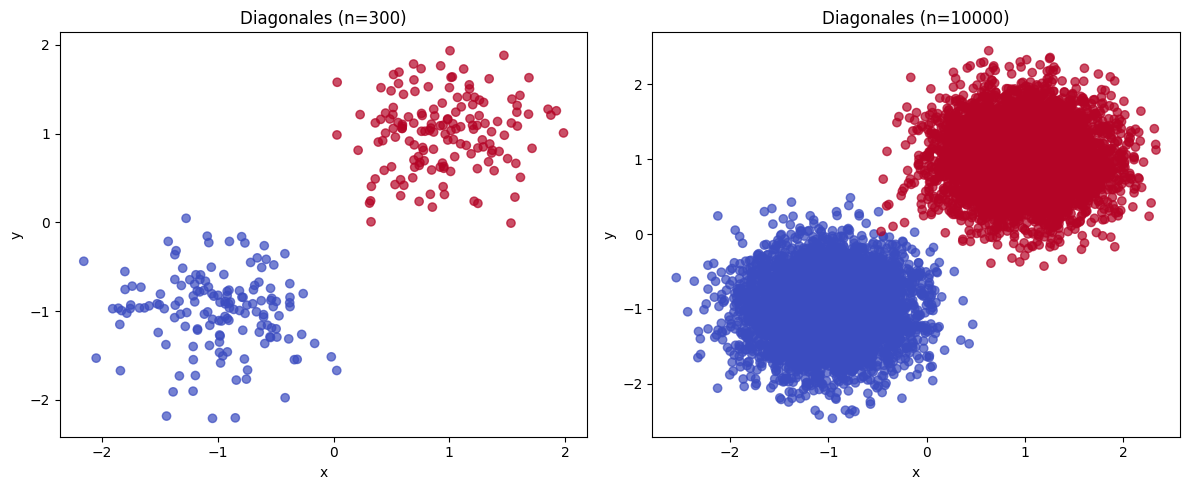

In [139]:
# Gráfica de datos generados: Diagonales
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagonales n=300
axs[0].scatter(diag1_X[:, 0], diag1_X[:, 1], c=diag1_y, cmap='coolwarm', alpha=0.7)
axs[0].set_title('Diagonales (n=300)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Diagonales n=10000
axs[1].scatter(diag2_X[:, 0], diag2_X[:, 1], c=diag2_y, cmap='coolwarm', alpha=0.7)
axs[1].set_title('Diagonales (n=10000)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

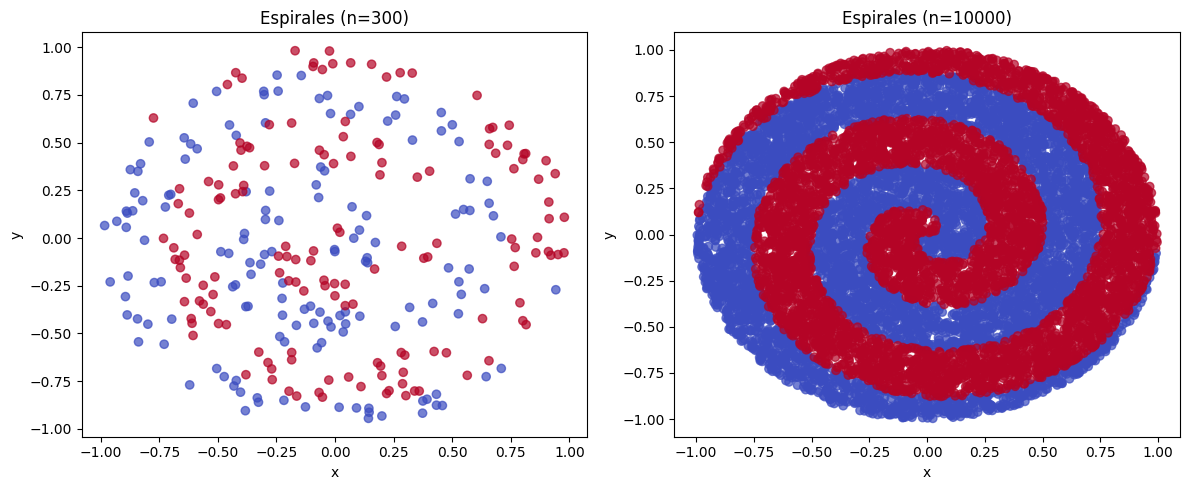

In [140]:
# Gráfica de datos generados: Espirales
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Espirales n=300
axs[0].scatter(espirales1_X[:, 0], espirales1_X[:, 1], c=espirales1_y, cmap='coolwarm', alpha=0.7)
axs[0].set_title('Espirales (n=300)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Espirales n=10000
axs[1].scatter(espirales2_X[:, 0], espirales2_X[:, 1], c=espirales2_y, cmap='coolwarm', alpha=0.7)
axs[1].set_title('Espirales (n=10000)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

# Ejercicio 2 (Ajuste de Modelos)

In [141]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [142]:
# Calcular el error de test del clasificador de arboles
def trainTreeData(xTest, yTest, xTrain, yTrain):
  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  clf.fit(xTrain, yTrain)

  errTrain = 1 - clf.score(xTrain, yTrain)
  errTest = 1 - clf.score(xTest, yTest)

  return errTrain, errTest

A continuación se grafican las predicciones sobre el conjunto de test de los arboles de decisión entrenados con 300 puntos para los conjuntos de datos de diagonales y espirales respectivamente:

In [143]:
print("Resultados con Decision Tree Classifier:")

errTrain, errTest = trainTreeData(diag1_X, diag1_y, diag2_X, diag2_y)
print("El error de test del conjunto de datos Diagonal es: {:.8f}".format(errTest))


errTrain, errTest = trainTreeData(espirales1_X, espirales1_y, espirales2_X, espirales2_y)
print("El error de test del conjunto de datos Espirales es: {:.8f}".format(errTest))

Resultados con Decision Tree Classifier:
El error de test del conjunto de datos Diagonal es: 0.00000000
El error de test del conjunto de datos Espirales es: 0.09666667


In [144]:
def k_vecinos():  
  # Clasificador k-vecinos y medición de error de test para cada conjunto
  from sklearn.neighbors import KNeighborsClassifier
  import matplotlib.pyplot as plt

  # Diagonales
  knn_diag = KNeighborsClassifier(n_neighbors=5)
  knn_diag.fit(diag1_X, diag1_y)
  errTest_diag = 1 - knn_diag.score(diag2_X, diag2_y)

  # Espirales
  knn_esp = KNeighborsClassifier(n_neighbors=5)
  knn_esp.fit(espirales1_X, espirales1_y)
  errTest_esp = 1 - knn_esp.score(espirales2_X, espirales2_y)

  print("Resultados con k-vecinos (k=5):")
  print("El error de test del conjunto de datos Diagonal es: {:.8f}".format(errTest_diag))
  print("El error de test del conjunto de datos Espirales es: {:.8f}".format(errTest_esp))

A continuación se muestran los errores de las predicciones de k-vecinos sobre el conjunto de test entrenados con 300 puntos para los conjuntos de datos de diagonales y espirales respectivamente:

In [145]:
k_vecinos()

Resultados con k-vecinos (k=5):
El error de test del conjunto de datos Diagonal es: 0.00060000
El error de test del conjunto de datos Espirales es: 0.16010000


# Estimacion de error de entrenamiento de 5-fold con Cross-validation


In [146]:
# k-NN con 5-fold cross-validation usando solo el conjunto de entrenamiento

# Diagonales
knn_diag_cv = KNeighborsClassifier(n_neighbors=5)
scores_diag = cross_val_score(knn_diag_cv, diag1_X, diag1_y, cv=5, scoring='accuracy')
err_cv_diag = 1 - scores_diag.mean()
print("Error de entrenamiento estimado por 5-fold CV (Diagonales): {:.8f}".format(err_cv_diag))

# Espirales
knn_esp_cv = KNeighborsClassifier(n_neighbors=5)
scores_esp = cross_val_score(knn_esp_cv, espirales1_X, espirales1_y, cv=5, scoring='accuracy')
err_cv_esp = 1 - scores_esp.mean()
print("Error de entrenamiento estimado por 5-fold CV (Espirales): {:.8f}".format(err_cv_esp))


Error de entrenamiento estimado por 5-fold CV (Diagonales): 0.00000000
Error de entrenamiento estimado por 5-fold CV (Espirales): 0.17333333


# Observaciones

Vemos que ambos métodos de estimación del error nos dan un error muy bajo para el conjunto de datos de diagonales. Esto ocurre porque la desviación estándar de la generacion de dichos datos es baja, lo que hace que los puntos estén muy agrupados y sea mas sencillo tanto para los arboles de decision como para k-vecinos predecir la clase a la que pertenece cada punto.

En cambio para el caso de las espirales, el error de test del decision tree es considerablemente menor al de k-vecinos. Esto sucede porque el arbol de decision puede particionar el espacio para adaptarse mejor a la forma del espiral. Mientras que k-vecinos depende de la proximidad local, por lo que en el caso particular de la espiral, en el cuál las clases de los puntos están entrelazadas, genera una peor predicción, ya que los vecinos cercanos pueden pertenecer a clases distintas.

El error de entrenamiento obtenido con 5-fold cross-validation es apenas superior al error de test obtenido con 5-fold. Esto puede deberse a que el conjunto de entrenamiento presente particularidades dificiles de predecir que no sean representativas del conjunto de test.


# Ejercicio 3 (Visualización)

In [147]:
import seaborn as sns  # visualización estilo matplotlib, trae datasets
import plotly as ply
from sklearn.datasets import load_iris  # clásico dataset de juguete
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
from plotly.graph_objects import Scatterpolar

# https://pypi.org/project/ChernoffFace/
! pip install git+https://github.com/antononcube/Python-packages.git#egg=ChernoffFace\&subdirectory=ChernoffFace --quiet
from ChernoffFace import chernoff_face

In [ ]:
# Cargado de Datasets
iris = load_iris(as_frame=True)
df_iris = iris.frame
df_iris['species'] = iris.target_names[iris.target]


df_titanic = sns.load_dataset("titanic")

print("Iris dataset:")
display(df_iris.head())
print("\nTitanic dataset:")
display(df_titanic.head())

Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Dataset Iris
## Preprocesado de los datos


In [ ]:
print("\nIris NaNs:")
print(df_iris.isna().sum())



Iris NaNs:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


El dataset de iris no presenta valores nulos, todas sus columnas aportan datos significativos, y no es necesario codificar variables categóricas.

## Ejercicio 3a: Biplots

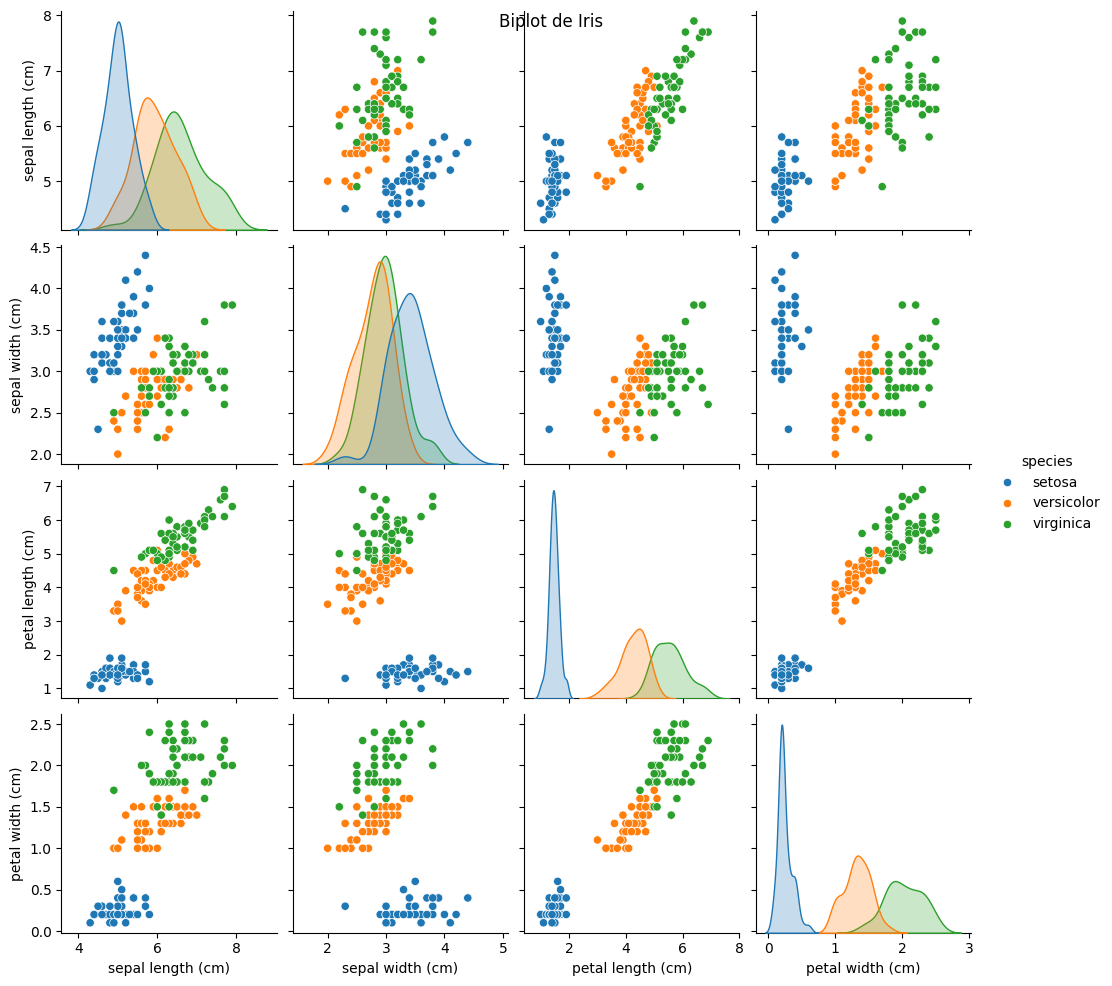

In [ ]:
sns.pairplot(df_iris, hue="species", vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])

plt.suptitle("Biplot de Iris")
plt.show()

La mejor dimension para dividir los datos es la especie de la planta. Haciendo esta división se visualizan mejor las distinciones entre las características de los distintos tipos de plantas, dado que las mismas especies de plantas tienden a tener caracteristicas similares.

Es facil ver que hay un outlier en el cual su sepal width es de aproximadamente 2.3cm, mientras que la media esta en 3.5cm (gráfico de fila 4 columna 2).

## Ejercicio 3b: Coordenadas Paralelas

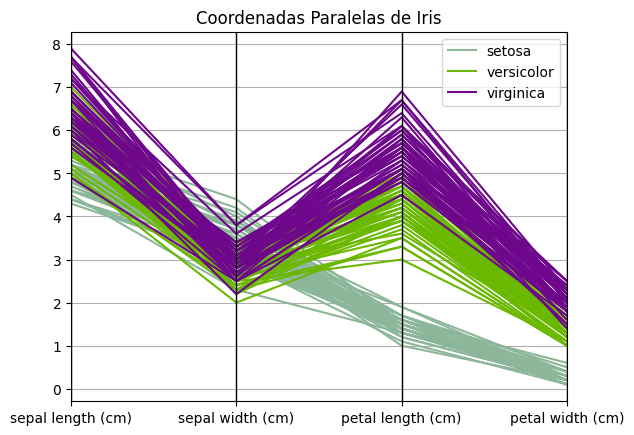

In [ ]:
parallel_coordinates(df_iris, 'species', cols=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])

plt.title("Coordenadas Paralelas de Iris")
plt.show()

En éste grafico puede verse claramente la variabilidad de los datos de las plantas según su especie. Se puede notar por ejemplo, que el lárgo de los pétalos de la especie setosa varía muy poco entre las distintas muestras, mientras que esa misma variable presenta mucha mas volatilidad entre cada muestra de la especie virginica.


# Ejercicio 3c: Star Plots

In [ ]:

fig = ply.graph_objects.Figure( )
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
feature_name = ["sepal length", "sepal width", "petal length", "petal width"]
df_iris_rescaled = variables_rescale(df_iris)

for s in df_iris_rescaled['species'].unique():
    trace = ply.graph_objects.Scatterpolar(
        r=df_iris_rescaled.loc[df_iris_rescaled['species'] == s, features].mean(),
        theta=feature_name, 
        fill='toself', 
        name=s)
    fig.add_trace(trace)


fig.show()



En esta gráfica se normalizaron los valores de los datos, de forma tal de ver una comparación directa entre las relaciones de los anchos y largos de las características de cada especie de planta.

## Ejercicio 3d: Chernoffs Faces

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


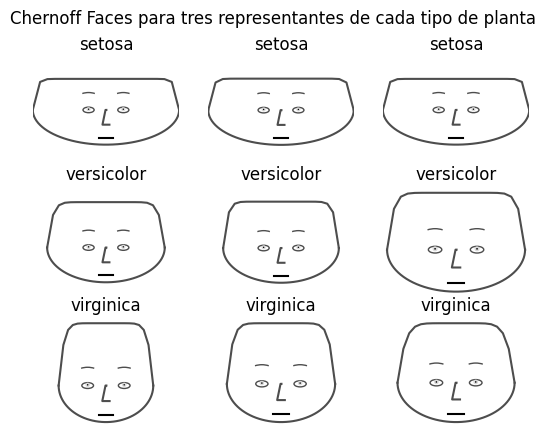

In [ ]:
# Seleccionamos tres representantes de cada especie
species = df_iris['species'].unique()
samples = []
titles = []

features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
for sp in species:
  reps = df_iris[df_iris_rescaled['species'] == sp].iloc[:3]
  samples.extend(reps[features].values)
  titles.extend([sp]*3)

fig = chernoff_face(data=np.array(samples), titles=titles)
fig.suptitle("Chernoff Faces para tres representantes de cada tipo de planta")
plt.show()

# Dataset Titanic

In [154]:
# Revisamos si el dataset tiene NaNs o valores vacios
print("\nTitanic NaNs:")
print(df_titanic.isna().sum())

# Cantidad total de datos
print("\nTitanic dataset size:",  df_titanic.shape[0])


Titanic NaNs:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Titanic dataset size: 891


Dado que el 77% de los datos de la cabina son inexistentes, se decide descartar el dato de la cabina del dataset.

También se remueven las columnas que no aportan información:
- Who (ya está en 'sex')
- Adult male (ya está en 'sex')
- Embark y Embark town no aportan informacion relevante
- Alive (ya está en 'survived')

In [155]:
df_titanic = df_titanic.drop(columns=['who', 'adult_male', 'deck', 'embark_town', 'embarked'])

# Codificamos variables categoricas
df_titanic['sex'] = df_titanic['sex'].map({'male': 0, 'female': 1})
df_titanic['class'] = df_titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
df_titanic['alone'] = df_titanic['alone'].map({False: 0, True: 1})

print("\nTitanic dataset:")
display(df_titanic.head())



Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,class,alive,alone
0,0,3,0,22.0,1,0,7.2500,3,no,0
1,1,1,1,38.0,1,0,71.2833,1,yes,0
2,1,3,1,26.0,0,0,7.9250,3,yes,1
3,1,1,1,35.0,1,0,53.1000,1,yes,0
4,0,3,0,35.0,0,0,8.0500,3,no,1


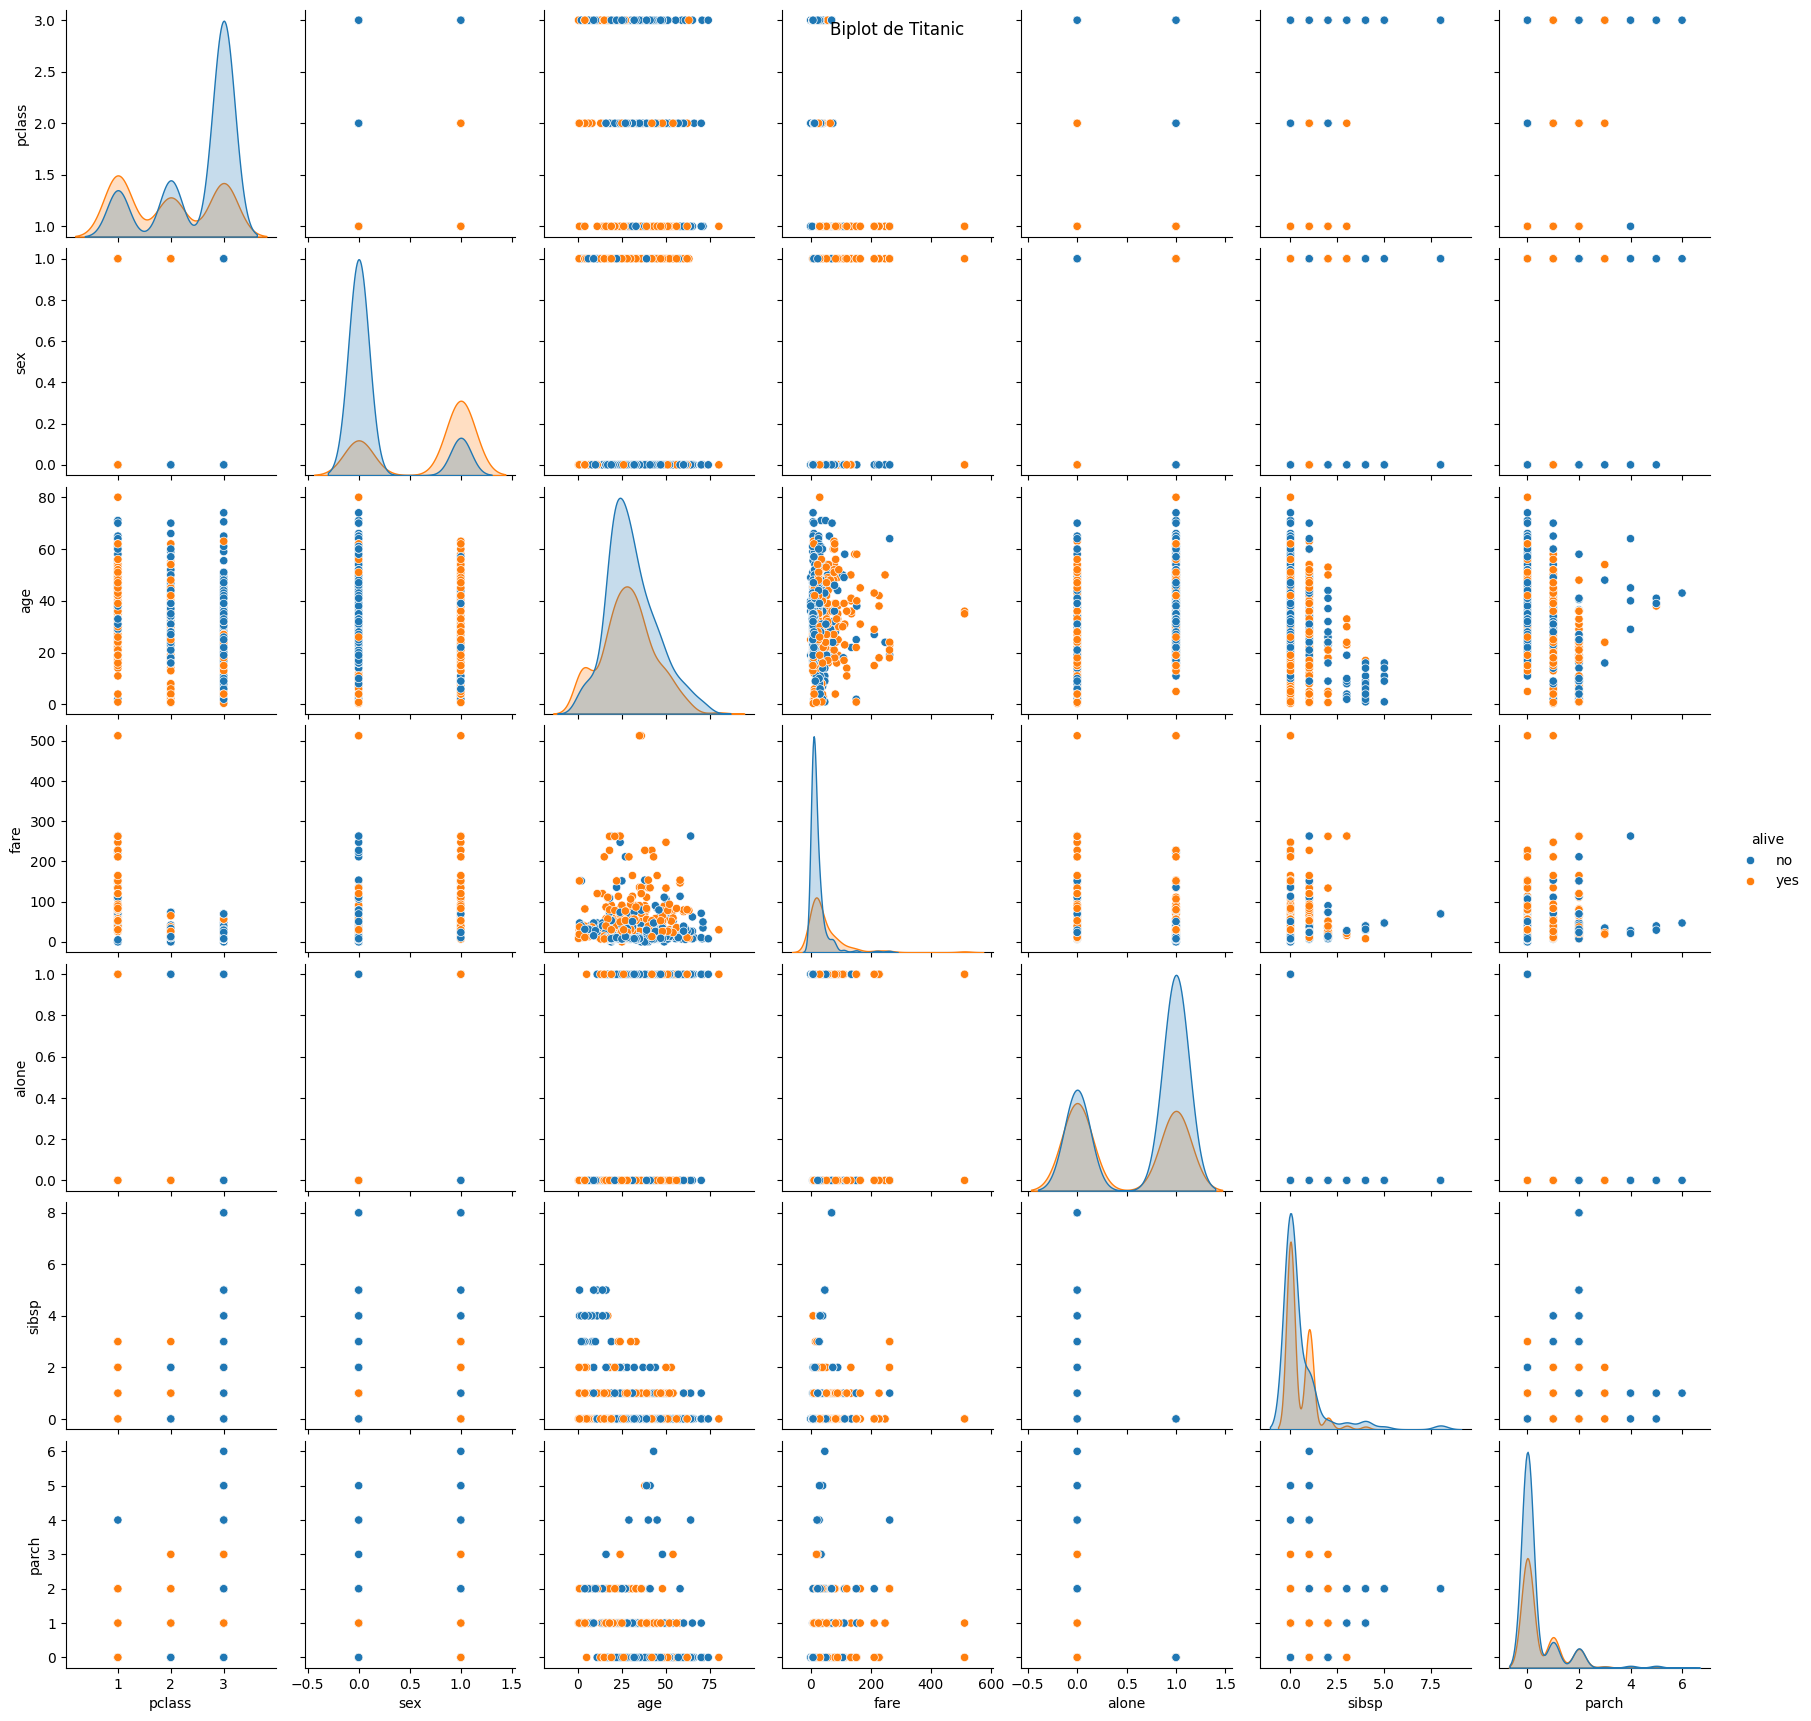

In [156]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(df_titanic, hue="alive", vars=["pclass", "sex", "age", "fare", "alone", "sibsp", "parch"])

# graficamos
plt.suptitle("Biplot de Titanic")
plt.show()

La mejor dimension para dividir los datos y hacer un análisis es saber si la persona sobrevivió o no. En base a esto se pueden estudiar los patrones en los datos que pueden haber influido en la taza de supervivencia de las personas a bordo del Titanic.

Puede verse claramente que las personas que pagaron un "fare" de 500 son outliers, siendo que la mayoria esta en el rango de los [0-300].
Tambien puede verse que las personas con hermanos/esposas mayores a 5 y con padres/hijos mayores a 4 son outliers.

Sin embargo, dado que muchas de las variables del dataset están dadas por variables categóricas codificadas, muchos de los gráficos del biplot no nos otorgan muchos datos.
Por ejemplo, el gráfico de alone x sexo solo muestra 4 puntos, que serían las 4 combinacione de las dos variables binarias.

## Ejercicio 3b: Coordenadas Paralelas

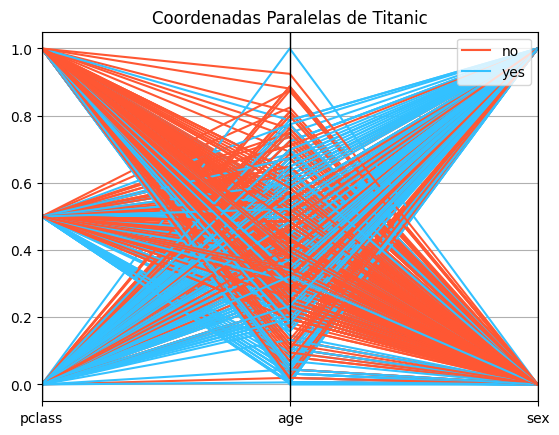

In [157]:

df_titanic_rescaled = variables_rescale(df_titanic)
parallel_coordinates(df_titanic_rescaled, 'alive', cols=["pclass", "age", "sex"], color=('#FF5733', '#33C1FF'))


# graficamos
plt.title("Coordenadas Paralelas de Titanic")
plt.show()

Normalizando los datos y graficando con coordenadas paralelas la clase, la edad y el sexo de los pasajeros, se puede observar una clara tendencia en los datos, donde 
las personas de la clase baja, las personas jóvenes, y las mujeres tienen una mayor probabilidad de haber sido sobrevivientes.

## Ejercicio 3c: Star Plots

In [158]:
# star plots para titanic
fig = ply.graph_objects.Figure( )
features = ["pclass", "age", "sex", "fare", "alone"]
for s in ['yes', 'no']:
    trace = ply.graph_objects.Scatterpolar(
        r=df_titanic_rescaled.loc[df_titanic_rescaled['alive'] == s, features].mean(),
        theta=features, 
        fill='toself', 
        name=s)
    fig.add_trace(trace)
# graficamos con plotly
fig.show()

Este gráfico comparativo ilustra perfectamente la diferencia de la tasa de supervivencia según cada factor relevante.
Puede verse que las mujeres tienen mayor probabilidad de haber sobrevivido, al igual que las personas de pclass mas baja.
Vale la pena destacar que las personas "solas" tienen una mayor tendencia a no haber sobrevivido.

## Ejercicio 3d: Chernoffs Faces

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


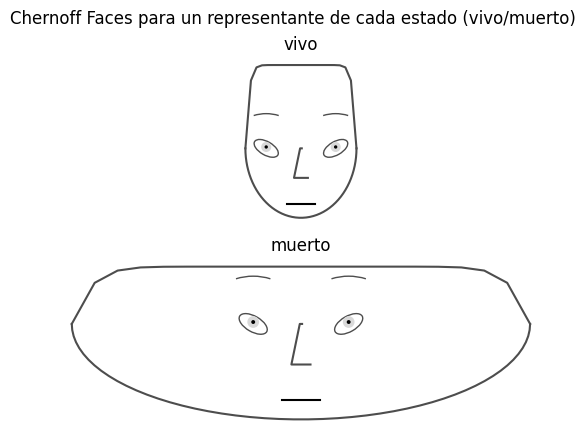

In [159]:
# Seleccionamos un representante vivo y uno muerto
alive_status = ['yes', 'no']
samples = []
titles = []

features = ["pclass", "age", "sex", "fare", "alone"]

for st in alive_status:
  reps = df_titanic_rescaled[df_titanic_rescaled['alive'] == st].iloc[:1]
  samples.extend(reps[features].values)

# Creamos las Chernoff faces
fig = chernoff_face(data=np.array(samples), titles=['vivo', 'muerto'])
fig.suptitle("Chernoff Faces para un representante de cada estado (vivo/muerto)")
plt.show()